In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [4]:
pd.set_option('display.max_columns', None)


In [5]:
df = pd.read_csv("Insurance claims data.csv")

print(df.head())

   policy_id  subscription_length  vehicle_age  customer_age region_code  \
0  POL045360                  9.3          1.2            41          C8   
1  POL016745                  8.2          1.8            35          C2   
2  POL007194                  9.5          0.2            44          C8   
3  POL018146                  5.2          0.4            44         C10   
4  POL049011                 10.1          1.0            56         C13   

   region_density segment model fuel_type     max_torque          max_power  \
0            8794      C2    M4    Diesel  250Nm@2750rpm  113.45bhp@4000rpm   
1           27003      C1    M9    Diesel  200Nm@1750rpm   97.89bhp@3600rpm   
2            8794      C2    M4    Diesel  250Nm@2750rpm  113.45bhp@4000rpm   
3           73430       A    M1       CNG   60Nm@3500rpm   40.36bhp@6000rpm   
4            5410      B2    M5    Diesel  200Nm@3000rpm   88.77bhp@4000rpm   

                 engine_type  airbags is_esc is_adjustable_steering 

In [9]:
df.shape

(58592, 41)

In [6]:
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   subscription_length               58592 non-null  float64
 2   vehicle_age                       58592 non-null  float64
 3   customer_age                      58592 non-null  int64  
 4   region_code                       58592 non-null  object 
 5   region_density                    58592 non-null  int64  
 6   segment                           58592 non-null  object 
 7   model                             58592 non-null  object 
 8   fuel_type                         58592 non-null  object 
 9   max_torque                        58592 non-null  object 
 10  max_power                         58592 non-null  object 
 11  engine_type                       58592 non-null  object 
 12  airb

In [7]:
df.isna().sum()/len(df)

policy_id                           0.0
subscription_length                 0.0
vehicle_age                         0.0
customer_age                        0.0
region_code                         0.0
region_density                      0.0
segment                             0.0
model                               0.0
fuel_type                           0.0
max_torque                          0.0
max_power                           0.0
engine_type                         0.0
airbags                             0.0
is_esc                              0.0
is_adjustable_steering              0.0
is_tpms                             0.0
is_parking_sensors                  0.0
is_parking_camera                   0.0
rear_brakes_type                    0.0
displacement                        0.0
cylinder                            0.0
transmission_type                   0.0
steering_type                       0.0
turning_radius                      0.0
length                              0.0


In [8]:
df.describe()

,subscription_length,vehicle_age,customer_age,region_density,airbags,displacement,cylinder,turning_radius,length,width,gross_weight,ncap_rating,claim_status
count,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000
mean,6.111688,1.388473,44.823935,18826.858667,3.137066,1162.355851,3.626963,4.852893,3850.476891,1672.233667,1385.276813,1.759950,0.063968
std,4.142790,1.134413,6.935604,17660.174792,1.832641,266.304786,0.483616,0.228061,311.457119,112.089135,212.423085,1.389576,0.244698
min,0.000000,0.000000,35.000000,290.000000,1.000000,796.000000,3.000000,4.500000,3445.000000,1475.000000,1051.000000,0.000000,0.000000
25%,2.100000,0.400000,39.000000,6112.000000,2.000000,796.000000,3.000000,4.600000,3445.000000,1515.000000,1185.000000,0.000000,0.000000
50%,5.700000,1.200000,44.000000,8794.000000,2.000000,1197.000000,4.000000,4.800000,3845.000000,1735.000000,1335.000000,2.000000,0.000000
75%,10.400000,2.200000,49.000000,27003.000000,6.000000,1493.000000,4.000000,5.000000,3995.000000,1755.000000,1510.000000,3.000000,0.000000
max,14.000000,20.000000,75.000000,73430.000000,6.000000,1498.000000,4.000000,5.200000,4300.000000,1811.000000,1720.000000,5.000000,1.000000


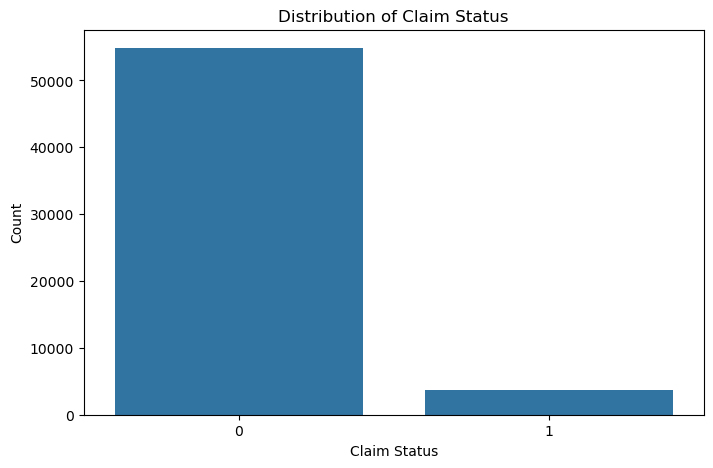

In [11]:
# plot the distribution of the target variable 'claim_status'
plt.figure(figsize=(8, 5))
sns.countplot(x='claim_status', data=df)
plt.title('Distribution of Claim Status')
plt.xlabel('Claim Status')
plt.ylabel('Count')
plt.show()